<ipython-input-2-f5693830f12d>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


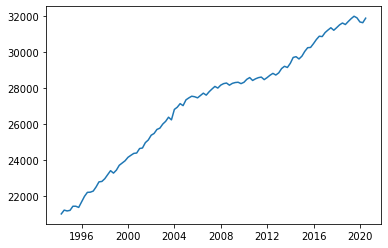

In [2]:
import pandas as pd
import numpy as np
# from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

main = pd.read_csv('./main.csv')


main['time']= pd.to_datetime(main['Quarter'].str.replace(' ','-'))#.replace()pd.to_datetime(df['Quarter'])
main.head()
main = main.set_index('time')
# main[' Cars'] = main[' Cars'].str.replace('..','')
cars = main[' Cars'].dropna(axis=0)

cars = cars[~cars.isin(['..'])]

cars = cars.astype('float')

plt.plot(cars)

# cars_num.columns
# print(time.head())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

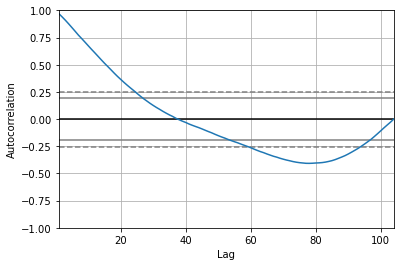

In [3]:
autocorrelation_plot(cars)

In [4]:
# get the suitable p -lag of predictors and q-lag of error
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cars)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

ADF Statistic: -2.313354
p-value: 0.167697


In [5]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(cars, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
#Best model:  ARIMA(3,2,0) #p,d,q

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1383.249, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1368.068, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1381.249, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1358.011, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=1295.108, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=1296.836, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1317.245, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1293.333, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1356.038, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1295.089, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1316.106, Time=0.08 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.010 seconds
                               S

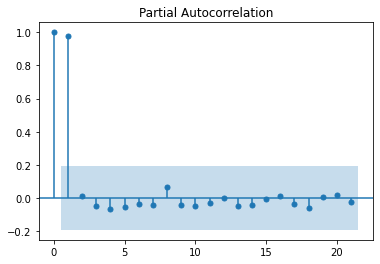

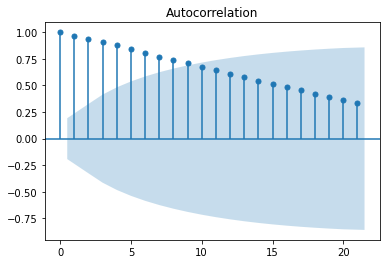

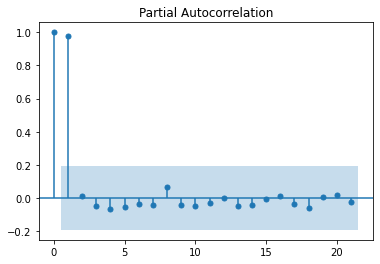

In [6]:
plot_acf(cars)
plot_pacf(cars)
# plot_acf(cars.diff())
# plot_pacf(cars.diff())

In [7]:
#build the arima
from statsmodels.tsa.arima_model import ARIMA

# 3,2,0 ARIMA Model
model = ARIMA(cars, order=(3,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2. Cars   No. Observations:                  102
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -637.260
Method:                       css-mle   S.D. of innovations            123.460
Date:                Tue, 02 Mar 2021   AIC                           1284.519
Time:                        17:45:06   BIC                           1297.644
Sample:                             2   HQIC                          1289.834
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1566      3.604     -0.321      0.748      -8.221       5.908
ar.L1.D2. Cars    -0.9006      0.072    -12.491      0.000      -1.042      -0.759
ar.L2.D2. Cars    -0.8347      0.081

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

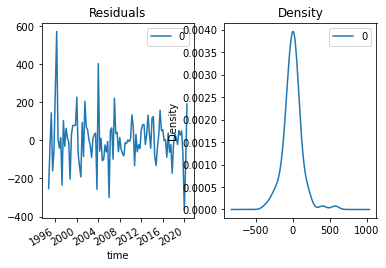

In [8]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

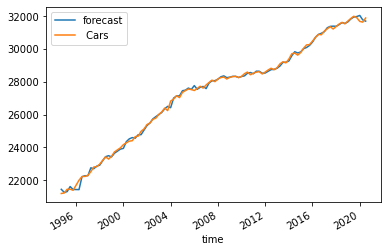

In [9]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [10]:
#predict
fc, se, conf = model_fit.forecast(4*10, alpha=0.05)  # 95% conf 

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                             ARIMA Model Results                              
Dep. Variable:               D2. Cars   No. Observations:                   67
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -423.121
Method:                       css-mle   S.D. of innovations            131.595
Date:                Fri, 19 Feb 2021   AIC                            856.241
Time:                        13:39:14   BIC                            867.265
Sample:                             2   HQIC                           860.603
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5036      4.735     -0.318      0.751     -10.784       7.777
ar.L1.D2. Cars    -0.9818      0.093    -10.529      0.000      -1.165      -0.799
ar.L2.D2. Cars    -0.8445      0.111

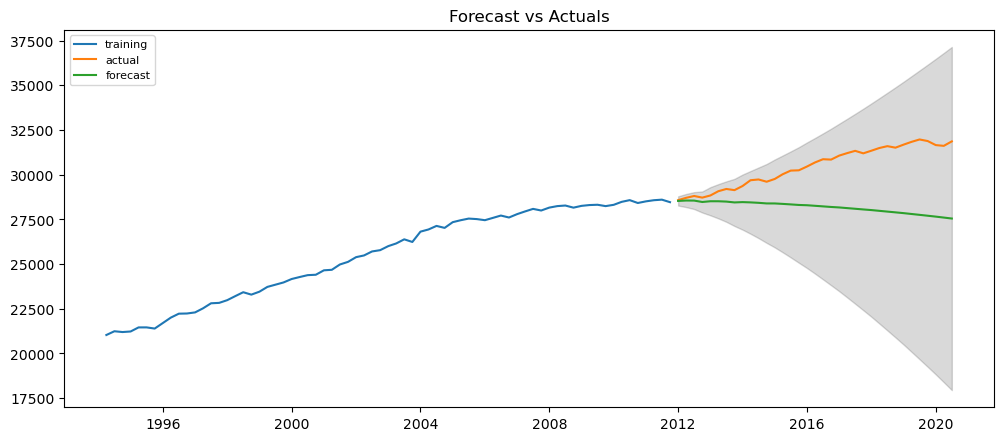

7.295545504861874

In [37]:
#if we spilit the data as training and testing data, and calculate the MAE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test = cars[np.round(2/3*len(cars)).astype(int):]
train = cars[:np.round(2/3*len(cars)).astype(int)]
model = ARIMA(train, order=(3,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Forecast
fc, se, conf = model_fit.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
# my_x_ticks = time

# plt.xticks(my_x_ticks)

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mean_absolute_percentage_error(test, fc) #7.295545504861874 acceptable

In [12]:
print(cars.index)

DatetimeIndex(['1994-04-01', '1994-07-01', '1994-10-01', '1995-01-01',
               '1995-04-01', '1995-07-01', '1995-10-01', '1996-04-01',
               '1996-07-01', '1996-10-01',
               ...
               '2018-04-01', '2018-07-01', '2018-10-01', '2019-01-01',
               '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01',
               '2020-04-01', '2020-07-01'],
              dtype='datetime64[ns]', name='time', length=104, freq=None)


In [82]:
import datetime

def create_assist_date(datestart = None,dateend = None):
	datestart=datetime.datetime.strptime(datestart,'%Y-%m-%d')
	dateend=datetime.datetime.strptime(dateend,'%Y-%m-%d')
	date_list = []
	date_list.append(datestart.strftime('%Y-%m-%d'))
	while datestart<dateend:
	    datestart+=datetime.timedelta(days = 365/4)
	    date_list.append(datestart.strftime('%Y-%m-%d'))
	return date_list

len(create_assist_date('2020-10-01','2030-10-01'))
new_index = pd.to_datetime(create_assist_date('2020-10-01','2030-09-29')) #2030-12-29 equals to the 2031-01-01
print(new_index)

DatetimeIndex(['2020-10-01', '2020-12-31', '2021-04-01', '2021-07-01',
               '2021-10-01', '2021-12-31', '2022-04-01', '2022-07-01',
               '2022-10-01', '2022-12-31', '2023-04-01', '2023-07-01',
               '2023-10-01', '2023-12-31', '2024-03-31', '2024-06-30',
               '2024-09-30', '2024-12-30', '2025-03-31', '2025-06-30',
               '2025-09-30', '2025-12-30', '2026-03-31', '2026-06-30',
               '2026-09-30', '2026-12-30', '2027-03-31', '2027-06-30',
               '2027-09-30', '2027-12-30', '2028-03-30', '2028-06-29',
               '2028-09-29', '2028-12-29', '2029-03-30', '2029-06-29',
               '2029-09-29', '2029-12-29', '2030-03-30', '2030-06-29',
               '2030-09-29'],
              dtype='datetime64[ns]', freq=None)


D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                             ARIMA Model Results                              
Dep. Variable:               D2. Cars   No. Observations:                  102
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -637.260
Method:                       css-mle   S.D. of innovations            123.460
Date:                Wed, 03 Mar 2021   AIC                           1284.519
Time:                        01:51:58   BIC                           1297.644
Sample:                             2   HQIC                          1289.834
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1566      3.604     -0.321      0.748      -8.221       5.908
ar.L1.D2. Cars    -0.9006      0.072    -12.491      0.000      -1.042      -0.759
ar.L2.D2. Cars    -0.8347      0.081

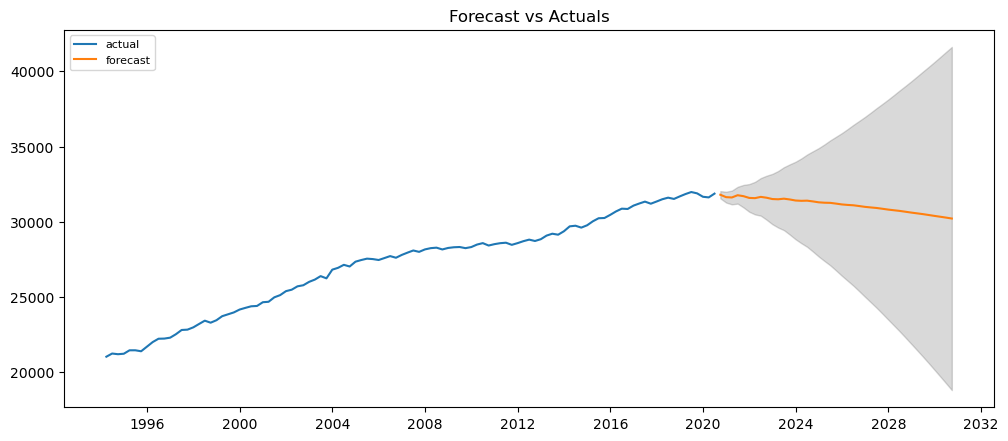

In [83]:
# test = cars[np.round(2/3*len(cars)).astype(int):]
# train = cars[:np.round(2/3*len(cars)).astype(int)]
model = ARIMA(cars, order=(3,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# model with whole data and Forecast until 2030
fc, se, conf = model_fit.forecast(4*10+1, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=new_index)
lower_series = pd.Series(conf[:, 0], index=new_index)
upper_series = pd.Series(conf[:, 1], index=new_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(cars, label='training')
plt.plot(cars, label='actual')
plt.plot(fc_series, label='forecast')
# my_x_ticks = time

# plt.xticks(my_x_ticks)

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [24]:
#the predicted value of number of cars at the begining of 2030 is 
predict_2030 = fc_series['2029-12-29']

30390.482971928603

transform the prediction of number of vehicles from quarterly to yearly

In [93]:
car_num_series = pd.concat([cars.iloc[[-3,-2,-1]],fc_series])
print(car_num_series)
fc_year = []
for i in range(0, len(car_num_series), 4):
    fc_year.append(car_num_series[i:i+4])
# print(fc_year)  
fc_year_1 =[np.mean(i) for i in fc_year]
# print(len(fc_year_1))
fc_year_1 = pd.DataFrame(fc_year_1)


11


get the prediction for petrol fraction

If we assume that the ratio of Petrol/ (Petrol+diesel) in the following years are the same as the ratio in 2019
then the ratio is 0.713616,--use this one

alternatively if we assume that the ratio of Petrol/ (Petrol+diesel) in the following years are the same as average the ratio from 2001 to 2019 then the ratio is 0.601906836



In [94]:
GB = pd.read_csv('./GB_all_data _Copy.csv')
GB.head()
GB = GB.set_index('Year')
fraction = GB['Petrol_Fraction']
# print(fraction)

In [95]:
ratio = 0.713616
fraction_2030 = (1-0.43)*ratio
fraction_2019 = fraction.loc[2019]

fraction_future = []
for i in range(11):
    fraction = fraction_2019 + (i+1)*(fraction_2030-fraction_2019)/11
    fraction_future.append(fraction)
    
print(len(fraction_future))  
fraction_future = pd.DataFrame(fraction_future)

11


the linear regression is 
Y = Total_GHGs
Intercept = -33982.64
Total_Vehicles = 0.002897256
Petrol_Fraction = 93365.83

In [96]:
Intercept = -33982.64
beta_Total_Vehicles = 0.002897256
beta_petrol_Fraction = 93365.83
Intercept =pd.DataFrame([Intercept]*11)

y = Intercept+ beta_Total_Vehicles*fc_year_1 +beta_petrol_Fraction *fraction_future

print(y)
# print(fraction_future)

               0
0   19650.988654
1   18094.412737
2   16537.780168
3   14981.091865
4   13424.348487
5   11867.550499
6   10310.698225
7    8753.791886
8    7196.831632
9    5639.817566
10   4082.749754


y is the prediction of Total_GHGs from 2020 to 2030